# Scissor

Reference: https://www.nature.com/articles/s41587-021-01091-3
<br>
github: https://sunduanchen.github.io/Scissor/vignettes/Scissor_Tutorial.html

In [1]:
# tool instalation
devtools::install_github('sunduanchen/Scissor')

stringi    (1.6.2  -> 1.7.5 ) [CRAN]
httpuv     (1.6.0  -> 1.6.3 ) [CRAN]
parallelly (1.28.1 -> 1.29.0) [CRAN]
igraph     (1.2.6  -> 1.2.8 ) [CRAN]


Installing 4 packages: stringi, httpuv, parallelly, igraph

Installing packages into ‘/home/nagai/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘stringi’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘httpuv’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘igraph’ had non-zero exit status”


✔  checking for file ‘/tmp/RtmpiexYQS/remotescc7a26ade8bd/sunduanchen-Scissor-d52fd90/DESCRIPTION’
─  preparing ‘Scissor’: (556ms)
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘Scissor_2.0.0.tar.gz’
   


Installing package into ‘/home/nagai/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [2]:
# load necessary packages
library(Scissor)

# Increase the time to download the files
options(timeout = 300) 

Loading required package: Seurat

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

Loading required package: Matrix



In [15]:
# Use authors datasets
location <- "https://xialab.s3-us-west-2.amazonaws.com/Duanchen/Scissor_data/"
load(url(paste0(location, 'scRNA-seq.RData')))

# Use saved datasets
#load()

In [16]:
dim(sc_dataset)

[1] 33694  4102

In [5]:
# Wrap for preprocessing single-cell expression matrix
sc_dataset <- Seurat_preprocessing(sc_dataset, verbose = F)

Warning message:
“The following arguments are not used: row.names”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [6]:
class(sc_dataset)

[1] "Seurat"
attr(,"package")
[1] "SeuratObject"

In [7]:
names(sc_dataset)

[1] "RNA"     "RNA_nn"  "RNA_snn" "pca"     "tsne"    "umap"

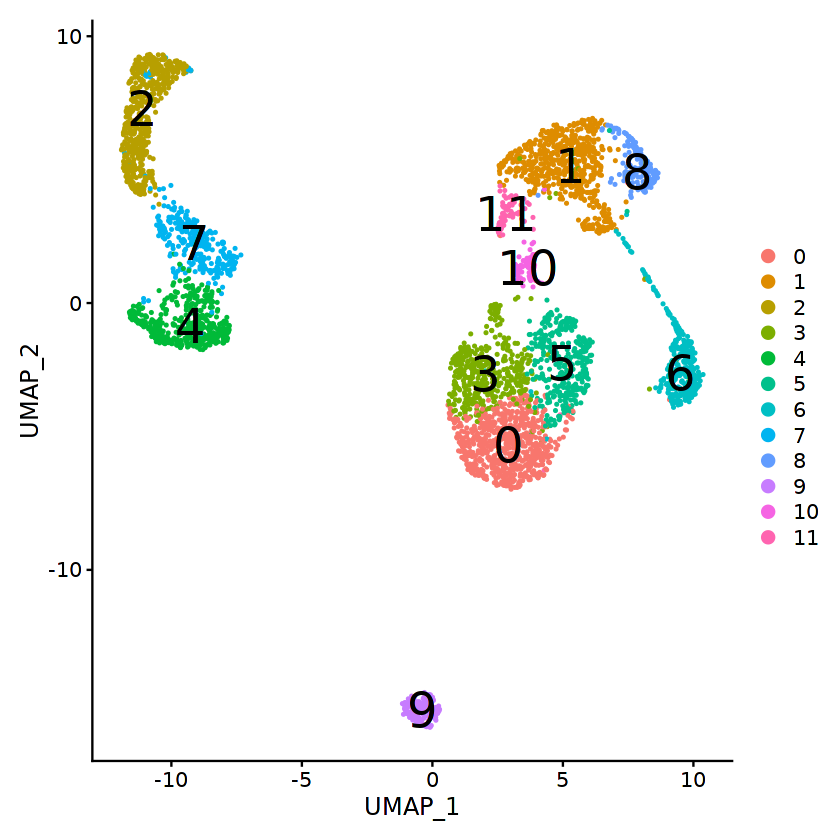

In [9]:
DimPlot(sc_dataset, reduction = 'umap', label = T, label.size = 10)

In [20]:
load(url(paste0(location, 'TCGA_LUAD_exp1.RData')))

In [ ]:
load(url(paste0(location, 'TCGA_LUAD_survival.RData')))

In [ ]:
dim(bulk_dataset)

In [ ]:
head(bulk_survival)

In [ ]:
all(colnames(bulk_dataset) == bulk_survival$TCGA_patient_barcode)

In [ ]:
phenotype <- bulk_survival[,2:3]
colnames(phenotype) <- c("time", "status")
head(phenotype)

In [ ]:
infos1 <- Scissor(bulk_dataset, sc_dataset, phenotype, alpha = 0.05, 
                 family = "cox", Save_file = 'Scissor_LUAD_survival.RData')

In [ ]:
names(infos1)

In [ ]:
length(infos1$Scissor_pos)

In [ ]:
infos1$Scissor_pos[1:4]

In [ ]:
length(infos1$Scissor_neg)

In [11]:
infos1$Scissor_neg

ERROR: Error in eval(expr, envir, enclos):  オブジェクト 'infos1' がありません 


In [14]:
load('Scissor_LUAD_survival.RData')

Warning message in readChar(con, 5L, useBytes = TRUE):
“ 圧縮されたファイル 'Scissor_LUAD_survival.RData' を開くことができません, 理由は 'そのようなファイルやディレクトリはありません' です ”


ERROR: Error in readChar(con, 5L, useBytes = TRUE):  コネクションを開くことができません 


In [13]:
load('Scissor_LUAD_TP53_mutation.RData')

Warning message in readChar(con, 5L, useBytes = TRUE):
“ 圧縮されたファイル 'Scissor_LUAD_TP53_mutation.RData' を開くことができません, 理由は 'そのようなファイルやディレクトリはありません' です ”


ERROR: Error in readChar(con, 5L, useBytes = TRUE):  コネクションを開くことができません 
